In [1]:
#pip install pandas-plink

In [2]:
import pandas_plink as pdpl

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
bim, fam, G = pdpl.read_plink("EUR.1.test/1000G.EUR.1")

Mapping files:   0%|          | 0/3 [00:00<?, ?it/s]/home/jhauk/.local/lib/python3.9/site-packages/pandas_plink/_read.py:338: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = read_csv(
Mapping files:  33%|███▎      | 1/3 [00:00<00:00,  6.04it/s]/home/jhauk/.local/lib/python3.9/site-packages/pandas_plink/_read.py:338: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = read_csv(
Mapping files: 100%|██████████| 3/3 [00:00<00:00, 11.17it/s]


In [4]:
bim

,chrom,snp,cm,pos,a0,a1,i
0,1,rs3094315,0.488776,752566,G,A,0
1,1,rs3131972,0.488868,752721,A,G,1
2,1,rs3131969,0.489734,754182,A,G,2
3,1,rs1048488,0.492507,760912,C,T,3
4,1,rs3115850,0.492605,761147,T,C,4
...,...,...,...,...,...,...,...
98637,1,rs4926502,293.389210,249209140,A,G,98637
98638,1,rs6704311,293.390550,249210707,A,G,98638
98639,1,rs34013644,293.391090,249211350,C,T,98639
98640,1,rs12746903,293.397000,249218992,C,T,98640


In [5]:
fam

,fid,iid,father,mother,gender,trait,i
0,HG00096,HG00096,0,0,0,-9,0
1,HG00097,HG00097,0,0,0,-9,1
2,HG00099,HG00099,0,0,0,-9,2
3,HG00101,HG00101,0,0,0,-9,3
4,HG00102,HG00102,0,0,0,-9,4
...,...,...,...,...,...,...,...
484,NA20822,NA20822,0,0,0,-9,484
485,NA20826,NA20826,0,0,0,-9,485
486,NA20827,NA20827,0,0,0,-9,486
487,NA20828,NA20828,0,0,0,-9,487


In [6]:
G

dask.array<transpose, shape=(98642, 489), dtype=float32, chunksize=(1024, 489), chunktype=numpy.ndarray>

In [7]:
import gzip
import pandas as pd

# Open the gzipped file
with gzip.open("gene_annot.txt.gz", "rt") as f:
    # Read the file content into a pandas DataFrame
    gene_annotations = pd.read_csv(f, sep="\t")

In [8]:
# Week 3

In [9]:
with open("my_coord", "w") as file:
  # Write some text to the file
  file.write("chr1\t252566\t1252566\tmygene\t0\+")

In [10]:
geno_df = pd.DataFrame(G.compute().transpose())
geno_df.columns = bim['snp']  # Use SNP IDs as columns
geno_df.index = fam['iid']  # Use individual IDs as rows

In [11]:
geno_df

snp,rs3094315,rs3131972,rs3131969,rs1048488,rs3115850,rs2286139,rs12562034,rs4040617,rs2980300,rs2519031,...,rs12043949,rs4417119,rs6587762,rs7527472,rs12025760,rs4926502,rs6704311,rs34013644,rs12746903,rs12726733
iid,,,,,,,,,,,,,,,,,,,,,
HG00096,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
HG00097,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
HG00099,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
HG00101,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
HG00102,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA20822,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
NA20826,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
NA20827,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [12]:
gene_expr = pd.read_csv('GD462.GeneQuantRPKM.50FN.samplename.resk10.txt.gz', compression='gzip', sep='\t')

In [13]:
gene_expr

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
0,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.101858,0.078110,0.048981,0.118597,0.004035,0.010925,...,0.088601,0.240010,0.137175,0.148494,0.038643,0.088509,0.029204,0.024423,0.044816,0.139186
1,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.183805,5.686911,2.434653,3.830894,6.612288,4.709646,...,13.428205,6.094500,12.536000,2.217262,3.573394,7.583364,4.052882,1.570378,4.900372,6.737308
2,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.199910,1.573572,0.521616,1.447225,3.565791,1.982681,...,3.225880,1.996067,2.854923,2.267343,1.331201,2.187895,1.004250,3.003316,1.984362,1.684954
3,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831940,0.069778,0.931086,0.620941,1.660668,0.570481,...,1.023381,1.127852,0.774409,1.495854,0.895342,1.513521,0.826377,1.021201,0.952502,0.740565
4,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,...,25.079490,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23717,ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.582832,34.071123,19.394365,37.523721,33.430473,37.844966,...,47.905182,33.224977,39.827675,27.096811,34.686342,37.386766,30.598840,33.516674,32.017940,38.341888
23718,ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054749,14.477899,11.584425,12.637956,12.015089,13.750655,...,11.723462,9.900372,10.473115,13.433413,15.832594,19.216176,10.213739,14.563192,15.637732,8.357117
23719,ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.112114,0.831797,0.253228,0.271568,0.486086,1.362640,...,1.168991,0.645389,0.819469,0.515448,0.463054,1.580658,0.701396,0.771233,0.857330,0.703369
23720,ENSG00000257337.1,ENSG00000257337.1,12,53448222,3.826396,6.045798,2.593872,4.447169,5.294657,4.106823,...,6.524398,6.017795,3.460273,3.905032,5.023161,5.333027,5.694370,8.142939,5.622043,6.026476


In [14]:
# Transpose gene expression data so that individual IDs are in the index
gene_expr_t = gene_expr.set_index('Gene_Symbol').transpose()

In [15]:
# The gene expression DataFrame now has individual IDs as rows and genes as columns
# Extract the individual IDs that match those in fam['iid']
gene_expr_t.index.name = 'iid'
matching_ids = gene_expr_t.index.intersection(fam['iid'])

In [16]:
# Filter both dataframes to only include these matching IDs
geno_df_filtered = geno_df.loc[matching_ids]
gene_expr_filtered = gene_expr_t.loc[matching_ids]

In [17]:
# Replace 'GeneX' with the actual gene symbol you're analyzing
gene_of_interest = 'ENSG00000152931.6'

# Filter the gene expression data for the gene of interest
gene_expr_filtered = gene_expr_t.loc[matching_ids, gene_of_interest]

# Merge the gene expression data with genotype data
merged_df = pd.concat([gene_expr_filtered, geno_df_filtered], axis=1)

# Rename the gene expression column for clarity
merged_df.rename(columns={gene_of_interest: 'gene_expression'}, inplace=True)

In [18]:
merged_df

,gene_expression,rs3094315,rs3131972,rs3131969,rs1048488,rs3115850,rs2286139,rs12562034,rs4040617,rs2980300,...,rs12043949,rs4417119,rs6587762,rs7527472,rs12025760,rs4926502,rs6704311,rs34013644,rs12746903,rs12726733
iid,,,,,,,,,,,,,,,,,,,,,
HG00096,0.101858,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
HG00097,0.07811,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
HG00099,0.048981,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
HG00101,0.004035,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
HG00102,0.010925,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA20814,0.038643,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
NA20815,0.088509,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
NA20819,0.024423,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [19]:
'''
import statsmodels.api as sm

# Ensure gene expression values are numeric
y = pd.to_numeric(merged_df['gene_expression'], errors='coerce')

# Iterate over each SNP column in the genotype data (independent variables)
results = {}
for snp in geno_df_filtered.columns:
    X = pd.to_numeric(merged_df[snp], errors='coerce')  # Convert SNP data to numeric
    X = sm.add_constant(X)  # Add an intercept for the linear regression
    
    # Drop rows with missing or invalid data (NaN)
    valid_data = pd.concat([y, X], axis=1).dropna()
    
    # Run the regression only if valid data exists
    if len(valid_data) > 0:
        model = sm.OLS(valid_data['gene_expression'], valid_data.iloc[:, 1:]).fit()  # Use .iloc to access predictors
        
        # Store the result for this SNP
        results[snp] = {
            'p-value': model.pvalues.iloc[1],  # Use .iloc to access the p-value for the SNP
            'beta': model.params.iloc[1],  # Use .iloc to access the beta coefficient for the SNP
            'r_squared': model.rsquared  # R-squared value
        }

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results).transpose()

# Sort by p-value to find significant eQTLs
significant_eqtls = results_df.sort_values('p-value').head()
print(significant_eqtls)
'''

"\nimport statsmodels.api as sm\n\n# Ensure gene expression values are numeric\ny = pd.to_numeric(merged_df['gene_expression'], errors='coerce')\n\n# Iterate over each SNP column in the genotype data (independent variables)\nresults = {}\nfor snp in geno_df_filtered.columns:\n    X = pd.to_numeric(merged_df[snp], errors='coerce')  # Convert SNP data to numeric\n    X = sm.add_constant(X)  # Add an intercept for the linear regression\n    \n    # Drop rows with missing or invalid data (NaN)\n    valid_data = pd.concat([y, X], axis=1).dropna()\n    \n    # Run the regression only if valid data exists\n    if len(valid_data) > 0:\n        model = sm.OLS(valid_data['gene_expression'], valid_data.iloc[:, 1:]).fit()  # Use .iloc to access predictors\n        \n        # Store the result for this SNP\n        results[snp] = {\n            'p-value': model.pvalues.iloc[1],  # Use .iloc to access the p-value for the SNP\n            'beta': model.params.iloc[1],  # Use .iloc to access the beta 

In [20]:
snps_in_window = bim[(bim['chrom'] == "1") & 
                         (bim['pos'] >= 252566) & 
                         (bim['pos'] <= 1252566)]

In [21]:
snps_in_window

,chrom,snp,cm,pos,a0,a1,i
0,1,rs3094315,0.488776,752566,G,A,0
1,1,rs3131972,0.488868,752721,A,G,1
2,1,rs3131969,0.489734,754182,A,G,2
3,1,rs1048488,0.492507,760912,C,T,3
4,1,rs3115850,0.492605,761147,T,C,4
...,...,...,...,...,...,...,...
156,1,rs1536168,1.252260,1241529,A,G,156
157,1,rs3737717,1.252797,1242084,G,A,157
158,1,rs12103,1.255337,1247494,T,C,158
159,1,rs12142199,1.255980,1249187,G,A,159


In [22]:
# Get the SNP IDs from the filtered SNPs
snp_ids = snps_in_window['snp'].values

# Filter the genotype DataFrame for the SNPs in the window
genotype_data_window = geno_df.loc[:, snp_ids]

In [23]:
genotype_data_window

snp,rs3094315,rs3131972,rs3131969,rs1048488,rs3115850,rs2286139,rs12562034,rs4040617,rs2980300,rs2519031,...,rs1739855,rs2477782,rs11586188,rs11260584,rs12410087,rs1536168,rs3737717,rs12103,rs12142199,rs34054191
iid,,,,,,,,,,,,,,,,,,,,,
HG00096,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
HG00097,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
HG00099,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
HG00101,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
HG00102,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA20822,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
NA20826,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0
NA20827,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0


In [24]:
# Filter both dataframes to only include these matching IDs
geno_df_filtered = genotype_data_window.loc[matching_ids]
gene_expr_filtered = gene_expr_t.loc[matching_ids]

In [25]:
# Replace 'GeneX' with the actual gene symbol you're analyzing
gene_of_interest = 'ENSG00000152931.6'

# Filter the gene expression data for the gene of interest
gene_expr_filtered = gene_expr_t.loc[matching_ids, gene_of_interest]

# Merge the gene expression data with genotype data
merged_df = pd.concat([gene_expr_filtered, geno_df_filtered], axis=1)

# Rename the gene expression column for clarity
merged_df.rename(columns={gene_of_interest: 'gene_expression'}, inplace=True)

In [26]:
import statsmodels.api as sm

# Ensure gene expression values are numeric
y = pd.to_numeric(merged_df['gene_expression'], errors='coerce')

# Iterate over each SNP column in the genotype data (independent variables)
results = {}
for snp in geno_df_filtered.columns:
    X = pd.to_numeric(merged_df[snp], errors='coerce')  # Convert SNP data to numeric
    X = sm.add_constant(X)  # Add an intercept for the linear regression
    
    # Drop rows with missing or invalid data (NaN)
    valid_data = pd.concat([y, X], axis=1).dropna()
    
    # Run the regression only if valid data exists
    if len(valid_data) > 0:
        model = sm.OLS(valid_data['gene_expression'], valid_data.iloc[:, 1:]).fit()  # Use .iloc to access predictors
        
        # Store the result for this SNP
        results[snp] = {
            'p-value': model.pvalues.iloc[1],  # Use .iloc to access the p-value for the SNP
            'beta': model.params.iloc[1],  # Use .iloc to access the beta coefficient for the SNP
            'r_squared': model.rsquared  # R-squared value
        }

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results).transpose()

# Sort by p-value to find significant eQTLs
significant_eqtls = results_df.sort_values('p-value').head()
print(significant_eqtls)

            p-value      beta  r_squared
rs4970420  0.004872 -0.016493   0.022943
rs9442373  0.030045  0.010051   0.013688
rs3748594  0.038706 -0.023893   0.012437
rs3748593  0.052245 -0.022778   0.010973
rs6696281  0.071271 -0.017948   0.009482


In [27]:
import numpy as np

In [28]:
results_df

,p-value,beta,r_squared
rs3094315,0.179067,-0.008622,0.005273
rs3131972,0.150053,-0.009219,0.006048
rs3131969,0.365582,-0.006137,0.002394
rs1048488,0.208763,-0.007981,0.004616
rs3115850,0.223496,-0.007717,0.004330
...,...,...,...
rs1536168,0.104462,-0.018155,0.007689
rs3737717,0.942082,-0.001428,0.000015
rs12103,0.541356,-0.003543,0.001092
rs12142199,0.302081,-0.005895,0.003114


In [29]:
results_df['neg_log10_p'] = -np.log10(results_df['p-value'])
results_df1 = pd.merge(results_df, snps_in_window, left_index=True, right_on='snp')

In [30]:
results_df1

,p-value,beta,r_squared,neg_log10_p,chrom,snp,cm,pos,a0,a1,i
0,0.179067,-0.008622,0.005273,0.746985,1,rs3094315,0.488776,752566,G,A,0
1,0.150053,-0.009219,0.006048,0.823755,1,rs3131972,0.488868,752721,A,G,1
2,0.365582,-0.006137,0.002394,0.437015,1,rs3131969,0.489734,754182,A,G,2
3,0.208763,-0.007981,0.004616,0.680346,1,rs1048488,0.492507,760912,C,T,3
4,0.223496,-0.007717,0.004330,0.650731,1,rs3115850,0.492605,761147,T,C,4
...,...,...,...,...,...,...,...,...,...,...,...
156,0.104462,-0.018155,0.007689,0.981041,1,rs1536168,1.252260,1241529,A,G,156
157,0.942082,-0.001428,0.000015,0.025911,1,rs3737717,1.252797,1242084,G,A,157
158,0.541356,-0.003543,0.001092,0.266517,1,rs12103,1.255337,1247494,T,C,158
159,0.302081,-0.005895,0.003114,0.519877,1,rs12142199,1.255980,1249187,G,A,159


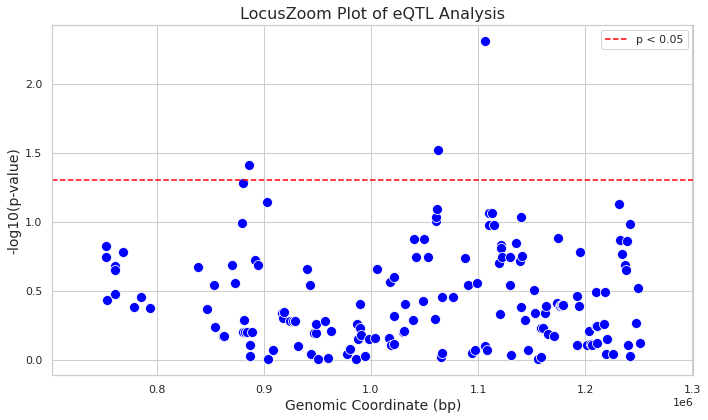

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetics for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df1, x='pos', y='neg_log10_p', color='blue', s=100)

# Adding labels and title
plt.title('LocusZoom Plot of eQTL Analysis', fontsize=16)
plt.xlabel('Genomic Coordinate (bp)', fontsize=14)
plt.ylabel('-log10(p-value)', fontsize=14)

# Adding a horizontal line for significance threshold (e.g., p < 0.05)
significance_threshold = -np.log10(0.05)
plt.axhline(y=significance_threshold, color='red', linestyle='--', label='p < 0.05')

# Customize x-axis limits (optional)
plt.xlim([results_df1['pos'].min() - 50000, results_df1['pos'].max() + 50000])

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Week 4 Tasks

In [40]:
chr1_genes = gene_expr[gene_expr['Chr'] == '1']['Gene_Symbol']

In [41]:
gene_expr

,TargetID,Gene_Symbol,Chr,Coord,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA20810,NA20811,NA20812,NA20813,NA20814,NA20815,NA20816,NA20819,NA20826,NA20828
0,ENSG00000152931.6,ENSG00000152931.6,5,59783540,0.101858,0.078110,0.048981,0.118597,0.004035,0.010925,...,0.088601,0.240010,0.137175,0.148494,0.038643,0.088509,0.029204,0.024423,0.044816,0.139186
1,ENSG00000183696.9,ENSG00000183696.9,7,48128225,8.183805,5.686911,2.434653,3.830894,6.612288,4.709646,...,13.428205,6.094500,12.536000,2.217262,3.573394,7.583364,4.052882,1.570378,4.900372,6.737308
2,ENSG00000139269.2,ENSG00000139269.2,12,57846106,1.199910,1.573572,0.521616,1.447225,3.565791,1.982681,...,3.225880,1.996067,2.854923,2.267343,1.331201,2.187895,1.004250,3.003316,1.984362,1.684954
3,ENSG00000169129.8,ENSG00000169129.8,10,116164515,0.831940,0.069778,0.931086,0.620941,1.660668,0.570481,...,1.023381,1.127852,0.774409,1.495854,0.895342,1.513521,0.826377,1.021201,0.952502,0.740565
4,ENSG00000134602.11,ENSG00000134602.11,X,131157293,27.646422,24.395572,16.445374,24.806650,25.113349,19.233988,...,25.079490,28.725528,24.450520,27.264069,26.912814,29.509210,26.462331,25.624009,25.707741,22.824957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23717,ENSG00000235472.1,ENSG00000235472.1,13,29172970,31.582832,34.071123,19.394365,37.523721,33.430473,37.844966,...,47.905182,33.224977,39.827675,27.096811,34.686342,37.386766,30.598840,33.516674,32.017940,38.341888
23718,ENSG00000114423.14,ENSG00000114423.14,3,105588396,14.054749,14.477899,11.584425,12.637956,12.015089,13.750655,...,11.723462,9.900372,10.473115,13.433413,15.832594,19.216176,10.213739,14.563192,15.637732,8.357117
23719,ENSG00000243312.2,ENSG00000243312.2,4,87791344,1.112114,0.831797,0.253228,0.271568,0.486086,1.362640,...,1.168991,0.645389,0.819469,0.515448,0.463054,1.580658,0.701396,0.771233,0.857330,0.703369
23720,ENSG00000257337.1,ENSG00000257337.1,12,53448222,3.826396,6.045798,2.593872,4.447169,5.294657,4.106823,...,6.524398,6.017795,3.460273,3.905032,5.023161,5.333027,5.694370,8.142939,5.622043,6.026476


In [44]:
gene_expr[gene_expr['Gene_Symbol'] == 'ENSG00000152931.6']['Coord'].iloc[0]

59783540

In [49]:
chr1_results = {}

for the_gene in chr1_genes:
    gene_info = gene_expr[gene_expr['Gene_Symbol'] == the_gene]
    snps_in_window = bim[(bim['chrom'] == "1") & 
                         (bim['pos'] >= int(gene_info['Coord'].iloc[0])-500000) & 
                         (bim['pos'] <= int(gene_info['Coord'].iloc[0])+500000)]
    
    # Get the SNP IDs from the filtered SNPs
    snp_ids = snps_in_window['snp'].values

    # Filter the genotype DataFrame for the SNPs in the window
    genotype_data_window = geno_df.loc[:, snp_ids]
    
    # Filter both dataframes to only include these matching IDs
    geno_df_filtered = genotype_data_window.loc[matching_ids]
    gene_expr_filtered = gene_expr_t.loc[matching_ids]
    
    # Replace 'GeneX' with the actual gene symbol you're analyzing
    gene_of_interest = the_gene

    # Filter the gene expression data for the gene of interest
    gene_expr_filtered = gene_expr_t.loc[matching_ids, gene_of_interest]

    # Merge the gene expression data with genotype data
    merged_df = pd.concat([gene_expr_filtered, geno_df_filtered], axis=1)

    # Rename the gene expression column for clarity
    merged_df.rename(columns={gene_of_interest: 'gene_expression'}, inplace=True)
    
    # Ensure gene expression values are numeric
    y = pd.to_numeric(merged_df['gene_expression'], errors='coerce')

    # Iterate over each SNP column in the genotype data (independent variables)
    results = {}
    for snp in geno_df_filtered.columns:
        X = pd.to_numeric(merged_df[snp], errors='coerce')  # Convert SNP data to numeric
        X = sm.add_constant(X)  # Add an intercept for the linear regression
    
        # Drop rows with missing or invalid data (NaN)
        valid_data = pd.concat([y, X], axis=1).dropna()
    
        # Run the regression only if valid data exists
        if len(valid_data) > 0:
            model = sm.OLS(valid_data['gene_expression'], valid_data.iloc[:, 1:]).fit()  # Use .iloc to access predictors

            if len(model.pvalues) > 1:
        
                # Store the result for this SNP
                results[snp] = {
                    'p-value': model.pvalues.iloc[1],  # Use .iloc to access the p-value for the SNP
                    'beta': model.params.iloc[1],  # Use .iloc to access the beta coefficient for the SNP
                    'r_squared': model.rsquared  # R-squared value
                }
            else:
                print(f"Insufficient model output for SNP {snp}, skipping.")

    # Convert results to a DataFrame for easier analysis
    results_df = pd.DataFrame(results).transpose()

    chr1_results[the_gene] = results_df
    print(the_gene + ' completed')

ENSG00000183814.10 completed
ENSG00000163207.5 completed
ENSG00000228449.1 completed
ENSG00000137962.8 completed
ENSG00000232848.1 completed
ENSG00000227280.1 completed
ENSG00000238081.1 completed
ENSG00000117480.10 completed
ENSG00000253368.2 completed
ENSG00000174827.9 completed
ENSG00000163349.15 completed
ENSG00000224566.1 completed
ENSG00000178585.10 completed
ENSG00000179023.6 completed
ENSG00000077585.8 completed
ENSG00000236140.1 completed
ENSG00000173110.5 completed
ENSG00000176261.10 completed
ENSG00000225154.1 completed
ENSG00000235545.1 completed
ENSG00000261000.1 completed
ENSG00000188931.3 completed
ENSG00000135747.7 completed
ENSG00000049247.8 completed
ENSG00000197982.10 completed
ENSG00000181450.12 completed
ENSG00000169641.9 completed
Insufficient model output for SNP rs2782831, skipping.
ENSG00000203710.5 completed
ENSG00000137996.8 completed
ENSG00000011009.5 completed
ENSG00000184678.8 completed
ENSG00000229162.1 completed
ENSG00000243480.3 completed
ENSG0000023660

ENSG00000225670.1 completed
ENSG00000058085.9 completed
ENSG00000163866.7 completed
ENSG00000134201.5 completed
ENSG00000137955.10 completed
ENSG00000198841.3 completed
ENSG00000232336.1 completed
ENSG00000117569.12 completed
ENSG00000158793.9 completed
ENSG00000232860.2 completed
ENSG00000241720.1 completed
ENSG00000223452.2 completed
ENSG00000230987.1 completed
ENSG00000143158.6 completed
ENSG00000163486.7 completed
ENSG00000237424.1 completed
ENSG00000157077.10 completed
ENSG00000229874.1 completed
ENSG00000236035.1 completed
ENSG00000142864.10 completed
ENSG00000117013.10 completed
ENSG00000225920.1 completed
ENSG00000117592.8 completed
ENSG00000231663.1 completed
ENSG00000117676.7 completed
ENSG00000116793.10 completed
ENSG00000242125.1 completed
ENSG00000143858.7 completed
ENSG00000239887.3 completed
ENSG00000119285.6 completed
ENSG00000134248.8 completed
ENSG00000203668.1 completed
ENSG00000234807.3 completed
ENSG00000230812.1 completed
ENSG00000231789.1 completed
ENSG0000011666

ENSG00000203965.7 completed
ENSG00000131791.6 completed
ENSG00000117318.8 completed
ENSG00000197056.5 completed
ENSG00000171824.9 completed
ENSG00000213540.3 completed
ENSG00000225871.1 completed
ENSG00000143816.6 completed
ENSG00000180098.5 completed
ENSG00000251020.1 completed
ENSG00000132781.11 completed
ENSG00000228172.1 completed
ENSG00000237950.1 completed
ENSG00000171488.9 completed
ENSG00000224834.1 completed
ENSG00000154222.7 completed
ENSG00000203685.5 completed
ENSG00000188290.6 completed
ENSG00000215845.6 completed
ENSG00000023909.5 completed
ENSG00000176393.6 completed
ENSG00000233708.1 completed
ENSG00000160679.8 completed
ENSG00000160051.7 completed
ENSG00000261254.1 completed
ENSG00000228264.1 completed
ENSG00000081721.6 completed
ENSG00000130695.8 completed
ENSG00000130775.11 completed
ENSG00000227741.1 completed
ENSG00000183831.6 completed
ENSG00000187145.10 completed
ENSG00000184022.2 completed
ENSG00000233478.1 completed
ENSG00000188404.4 completed
ENSG00000188641.8

Insufficient model output for SNP rs2782831, skipping.
ENSG00000226945.1 completed
ENSG00000143398.14 completed
ENSG00000164002.7 completed
ENSG00000169905.7 completed
Insufficient model output for SNP rs2782831, skipping.
ENSG00000236911.1 completed
ENSG00000132122.6 completed
ENSG00000188558.4 completed
ENSG00000117791.11 completed
ENSG00000159352.10 completed
ENSG00000117519.11 completed
ENSG00000234329.1 completed
ENSG00000143384.7 completed
ENSG00000120949.10 completed
ENSG00000126067.7 completed
ENSG00000230368.2 completed
ENSG00000118197.8 completed
ENSG00000234222.1 completed
ENSG00000143013.7 completed
ENSG00000127481.9 completed
ENSG00000227630.1 completed
ENSG00000254685.1 completed
ENSG00000143110.7 completed
ENSG00000215915.5 completed
ENSG00000162777.12 completed
ENSG00000224521.1 completed
ENSG00000175262.9 completed
ENSG00000158062.13 completed
ENSG00000198162.6 completed
ENSG00000225721.1 completed
ENSG00000117143.8 completed
ENSG00000223759.1 completed
ENSG00000183888

ENSG00000242937.1 completed
ENSG00000183431.7 completed
ENSG00000143443.8 completed
ENSG00000153904.12 completed
ENSG00000211454.8 completed
ENSG00000238003.1 completed
ENSG00000254539.1 completed
ENSG00000163050.10 completed
ENSG00000131233.8 completed
ENSG00000217801.4 completed
ENSG00000250784.1 completed
ENSG00000224727.1 completed
ENSG00000237276.3 completed
ENSG00000135823.9 completed
ENSG00000224255.1 completed
ENSG00000232393.1 completed
ENSG00000135847.4 completed
ENSG00000223612.2 completed
ENSG00000174502.14 completed
ENSG00000162373.7 completed
ENSG00000196505.5 completed
ENSG00000241013.1 completed
ENSG00000225616.1 completed
ENSG00000177181.9 completed
ENSG00000135862.4 completed
ENSG00000065600.8 completed
ENSG00000241014.1 completed
ENSG00000250575.1 completed
ENSG00000196754.5 completed
ENSG00000218283.2 completed
ENSG00000126705.7 completed
ENSG00000261349.1 completed
ENSG00000143457.5 completed
ENSG00000197147.6 completed
ENSG00000173726.6 completed
ENSG00000117153.1

ENSG00000143515.12 completed
ENSG00000229841.1 completed
ENSG00000236872.1 completed
ENSG00000135775.8 completed
ENSG00000232672.1 completed
ENSG00000171729.8 completed
ENSG00000160783.13 completed
ENSG00000232571.1 completed
ENSG00000143344.9 completed
ENSG00000203943.4 completed
ENSG00000151414.10 completed
ENSG00000178965.9 completed
ENSG00000237514.2 completed
ENSG00000229191.1 completed
ENSG00000066185.8 completed
ENSG00000116783.9 completed
ENSG00000116191.11 completed
ENSG00000224939.1 completed
ENSG00000187942.7 completed
ENSG00000143061.13 completed
ENSG00000162613.11 completed
ENSG00000183726.6 completed
ENSG00000117408.5 completed
ENSG00000136631.7 completed
ENSG00000134215.11 completed
ENSG00000155761.9 completed
ENSG00000143811.11 completed
ENSG00000160049.6 completed
ENSG00000078808.11 completed
ENSG00000177151.3 completed
ENSG00000162552.8 completed
ENSG00000116688.10 completed
ENSG00000172456.11 completed
ENSG00000251503.2 completed
ENSG00000162407.8 completed
ENSG00000

ENSG00000117036.7 completed
ENSG00000085465.10 completed
ENSG00000143512.8 completed
ENSG00000001460.12 completed
ENSG00000162775.9 completed
ENSG00000188822.6 completed
ENSG00000230337.1 completed
ENSG00000224315.1 completed
ENSG00000135837.11 completed
ENSG00000126107.10 completed
ENSG00000078618.13 completed
ENSG00000116819.6 completed
ENSG00000231084.1 completed
ENSG00000215835.2 completed
ENSG00000235105.1 completed
ENSG00000231551.2 completed
ENSG00000116670.9 completed
ENSG00000248333.2 completed
ENSG00000122417.9 completed
ENSG00000203815.2 completed
ENSG00000232185.1 completed
Insufficient model output for SNP rs11805314, skipping.
ENSG00000135801.5 completed
ENSG00000055070.11 completed
ENSG00000116396.9 completed
ENSG00000117298.10 completed
ENSG00000143590.9 completed
ENSG00000228217.1 completed
ENSG00000261223.1 completed
ENSG00000117697.10 completed
ENSG00000233401.1 completed
ENSG00000160785.7 completed
ENSG00000230798.1 completed
ENSG00000162692.5 completed
ENSG00000235

ENSG00000007923.11 completed
ENSG00000231709.1 completed
ENSG00000143412.5 completed
ENSG00000159658.5 completed
ENSG00000132773.7 completed
ENSG00000143420.12 completed
ENSG00000000457.8 completed
ENSG00000235079.1 completed
ENSG00000117289.7 completed
ENSG00000097096.8 completed
ENSG00000235400.1 completed
ENSG00000117016.5 completed
ENSG00000170385.9 completed
ENSG00000233621.1 completed
ENSG00000117450.9 completed
ENSG00000142623.8 completed
ENSG00000090020.5 completed
ENSG00000203818.5 completed
ENSG00000235750.4 completed
ENSG00000203684.5 completed
ENSG00000152382.5 completed
ENSG00000162695.6 completed
ENSG00000169991.5 completed
ENSG00000163435.10 completed
ENSG00000186086.11 completed
ENSG00000092978.5 completed
ENSG00000077152.5 completed
ENSG00000203661.2 completed
ENSG00000117020.12 completed
ENSG00000229372.1 completed
ENSG00000155366.11 completed
ENSG00000162517.8 completed
ENSG00000158055.11 completed
ENSG00000162620.10 completed
ENSG00000231700.2 completed
ENSG00000143

ENSG00000162946.14 completed
ENSG00000236905.1 completed
ENSG00000159363.13 completed
ENSG00000067704.8 completed
ENSG00000117151.7 completed
ENSG00000075945.8 completed
ENSG00000179172.7 completed
ENSG00000159377.6 completed
ENSG00000236997.1 completed
ENSG00000259834.1 completed
ENSG00000143776.12 completed
ENSG00000162607.8 completed
ENSG00000225886.1 completed
ENSG00000116731.15 completed
ENSG00000117593.8 completed
ENSG00000181227.2 completed
ENSG00000054116.7 completed
ENSG00000232883.1 completed
ENSG00000158825.5 completed
ENSG00000155380.7 completed
ENSG00000143375.9 completed
ENSG00000163113.8 completed
ENSG00000157184.5 completed
ENSG00000228126.1 completed
ENSG00000258082.1 completed
ENSG00000162511.6 completed
ENSG00000168509.13 completed
ENSG00000116898.7 completed
ENSG00000241860.1 completed
ENSG00000116157.5 completed
ENSG00000174529.6 completed
ENSG00000198815.4 completed
ENSG00000157916.12 completed
ENSG00000197084.3 completed
ENSG00000173212.4 completed
ENSG0000023246

In [50]:
import json

In [51]:
chr1_results

{'ENSG00000183814.10':              p-value      beta  r_squared
 rs6426089   0.030385  0.524494   0.013632
 rs1467143   0.030385  0.524494   0.013632
 rs868966    0.784214  0.066733   0.000220
 rs10753410  0.126770  0.551515   0.006804
 rs10799326  0.226326  0.429218   0.004277
 ...              ...       ...        ...
 rs10916039  0.678353  0.113533   0.000503
 rs6690578   0.591269 -0.147286   0.000844
 rs10916042  0.963967  0.011715   0.000006
 rs6426541   0.385560  0.212403   0.002202
 rs6657842   0.394219 -0.578222   0.002123
 
 [401 rows x 3 columns],
 'ENSG00000163207.5':              p-value      beta     r_squared
 rs10888486  0.978859 -0.017903  2.056290e-06
 rs3829868   0.986145 -0.011705  8.830609e-07
 rs7521839   0.970952  0.024433  3.882972e-06
 rs4240877   0.465414  0.458659  1.559082e-03
 rs4285700   0.967670 -0.027256  4.810321e-06
 ...              ...       ...           ...
 rs3006490   0.315062 -0.965898  2.951223e-03
 rs6680386   0.865903  0.125939  8.349604e-05
